In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import numpy as np
from scipy.stats import spearmanr

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [2]:
#csv file of all electrophysiology, morphology features, ion conductance, nm_id
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
#csv file of all electrophysiology, morphology features, ion conductance, nm_id, including cell type
all_features_cell_type = pd.read_csv("C:/Users/Allose/Notebook/all_features_cell_type.csv", index_col=0)

#transcriptomic gene expression data by cell type
transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
#transcriptomic gene expressions data with all separate cortical layers
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_df.csv', index_col=0)
#transcriptomic gene expression data with only cre-line
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)

#relavtive ion conductance data for only cre-lines
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
#absolute ion conductance data for cell types
abs_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/abs_parameter_df.csv", index_col=0)
#relative conductance data for cell types
sep_layer_cre_parameter_df = pd.read_csv('sep_layer_cre_parameter_df.csv', index_col=0)

#csv for entrenz symbol and associated gene
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)


f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

f = open("sep_spearman_corr_ranks.json","r")
data = json.load(f)
sep_spearman_corr_ranks = data
f.close()

f = open("abs_spearman_corr_ranks.json","r")
data = json.load(f)
abs_spearman_corr_ranks = data
f.close()



sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

parameters = ['gbar_Im', 'gbar_Ih', 'gbar_NaTs', 'gbar_Nap', 'gbar_K_P', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas', 'apic_g_pas', 'gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Im_v2']

NameError: name 'pd' is not defined

In [3]:
ion_channel_genes = pd.read_csv("C:/Users/Allose/Notebook/targets_and_families.csv", index_col=0)

In [4]:
ion_channel_genes = ion_channel_genes[ion_channel_genes['MGI symbol'].notnull()]
gene_channel = ion_channel_genes.loc["vgic"]
gene_channel = gene_channel['MGI symbol'].values
gene_channel = list(gene_channel)


In [5]:
all_features = all_features[all_features["soma_surface"].notna()]
all_features = all_features[all_features["nm_id"].notna()]
all_features

,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,...,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2,structure_layer,reconstruction_type
0,NaN,0.850561,0.527213,75.133929,0.966709,134.700000,22.697498,0.083355,1.187680,13.295200,...,9.312563e-04,1.506155e-04,9.302760e-05,1.670824e-07,NaN,NaN,NaN,NaN,3,full
19,NaN,0.851035,0.424750,76.550000,0.884581,8.650000,15.299999,0.032146,1.173160,14.217820,...,8.431495e-04,9.995673e-04,5.671443e-06,2.616283e-05,NaN,NaN,NaN,NaN,3,full
25,NaN,0.897780,0.414033,42.266667,0.822614,42.867391,-111.638115,0.325524,1.101295,1.775697,...,5.897852e-04,5.696629e-04,1.204651e-04,NaN,NaN,NaN,NaN,NaN,5,dendrite-only
44,NaN,0.925520,0.594393,87.750000,0.998858,39.338333,-41.105001,0.364333,1.111440,3.734920,...,1.270692e-04,3.017657e-04,1.215206e-05,1.000329e-07,NaN,NaN,NaN,NaN,5,full
64,NaN,0.919328,0.279353,41.273973,0.861677,97.000000,23.797500,0.124640,1.156475,6.003742,...,2.749641e-04,1.866747e-04,1.118354e-05,2.817672e-06,NaN,NaN,NaN,NaN,5,dendrite-only
66,NaN,0.908433,0.421412,44.322222,0.835763,101.536111,20.791873,0.136552,1.275455,3.406938,...,1.406299e-05,1.312304e-04,1.006484e-07,7.215276e-05,NaN,NaN,NaN,NaN,5,dendrite-only
74,NaN,0.897794,0.247356,47.127273,0.779838,80.450455,13.153750,0.222145,1.126865,5.306637,...,1.990249e-04,4.512351e-05,6.359287e-06,2.815157e-05,NaN,NaN,NaN,NaN,4,dendrite-only
78,NaN,0.867570,0.413842,66.156250,0.784640,NaN,-40.657502,0.129997,1.035295,8.761275,...,5.595683e-04,5.414292e-04,4.737021e-04,3.083321e-07,NaN,NaN,NaN,NaN,5,dendrite-only
107,NaN,0.845901,0.896802,99.738095,0.930433,368.660000,-88.739995,0.078595,1.278020,4.220807,...,4.566053e-05,7.283679e-07,1.467076e-05,1.787336e-05,NaN,NaN,NaN,NaN,5,full
109,NaN,0.789621,0.097682,128.000000,0.966092,26.884444,32.990000,0.767680,1.067080,6.448993,...,7.632841e-06,8.918506e-05,1.001606e-07,NaN,0.079961,2.295786e-05,1.146699e-01,4.970771e-07,3,full


In [6]:
absolute = pd.concat([all_features_cell_type[['cell_type']], all_features[['soma_surface']]*all_features[['gbar_Kv3_1']]], axis = 1)
absolute

,cell_type,gbar_Kv3_1,soma_surface
0,False,NaN,NaN
1,False,NaN,NaN
2,False,NaN,NaN
3,False,NaN,NaN
4,False,NaN,NaN
5,False,NaN,NaN
6,False,NaN,NaN
7,False,NaN,NaN
8,False,NaN,NaN
9,False,NaN,NaN


In [7]:
all_features['soma_surface']*all_features['gbar_Kv3_1']

0        213.896562
19       254.608908
25        15.968544
44        68.232324
64        63.267978
66        98.125858
74        18.816621
78        45.501167
107      136.132093
109       11.387689
117       40.392830
120      117.809946
124       19.485632
136       60.979344
139      400.167161
143      234.257313
147       72.644949
155       15.389598
159      244.925678
162       44.538212
178       14.895125
201      228.749926
211       16.067580
213       43.609525
232        0.001029
233      161.616308
239       14.759774
248      811.429839
253      150.123130
257        0.253438
           ...     
2076      16.145366
2084     142.289287
2086      58.938867
2090      27.950649
2116     131.810075
2124    1243.946844
2129     462.361784
2131      21.413943
2141      44.975847
2156     133.905622
2181      71.203990
2185      72.215868
2186      84.964099
2190      56.839506
2194     104.184545
2195      81.612739
2209      31.690376
2214     402.525905
2222      62.902164


In [17]:
all_features['soma_surface']*all_features['gbar_Kv3_1']

0        213.896562
19       254.608908
25        15.968544
44        68.232324
64        63.267978
66        98.125858
74        18.816621
78        45.501167
107      136.132093
109       11.387689
117       40.392830
120      117.809946
124       19.485632
136       60.979344
139      400.167161
143      234.257313
147       72.644949
155       15.389598
159      244.925678
162       44.538212
178       14.895125
201      228.749926
211       16.067580
213       43.609525
232        0.001029
233      161.616308
239       14.759774
248      811.429839
253      150.123130
257        0.253438
           ...     
2076      16.145366
2084     142.289287
2086      58.938867
2090      27.950649
2116     131.810075
2124    1243.946844
2129     462.361784
2131      21.413943
2141      44.975847
2156     133.905622
2181      71.203990
2185      72.215868
2186      84.964099
2190      56.839506
2194     104.184545
2195      81.612739
2209      31.690376
2214     402.525905
2222      62.902164


In [8]:
for para in parameters:
    for index, row in all_features.iterrows():
        all_features.set_value(index, '{}_abs'.format(para), row['soma_surface']*row[para])

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
abs_parameter_df.to_csv('abs_parameter_df.csv')

In [18]:
abs_conductance = pd.DataFrame()
all_features_cell_type[['cell_type']]
cut = pd.concat([all_features_cell_type, all_features[['soma_surface']]], axis = 1)

for index, row in all_features.iterrows():
    
    cre_line_palette.update({row['driver_lines_label']:row['driver_lines_color']})
    
for parameter in parameters:
    new_cut = pd.concat([cut, all_features[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", "specimen_id"]).count(level="cell_type")
    cell_type_parameter_count = pd.concat([cell_type_parameter_count, count[[parameter]]], axis = 1)

cell_type_parameter_count

NameError: name 'cre_line_palette' is not defined

In [9]:
abs_conductance = pd.DataFrame()
abs_conductance = pd.concat([all_features_cell_type, all_features[['soma_surface']]], axis = 1)


In [10]:
for parameter in parameters:
    abs_conductance['abs_{}'.format(parameter)] = np.nan
    

In [11]:
for index, row in abs_conductance.iterrows():
    for parameter in parameters:
        abs_conductance.set_value(index, 'abs_{}'.format(parameter), row[parameter]*row['soma_surface'])
        

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
abs_conductance

,cell_type,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,...,abs_gamma_CaDynamics,abs_decay_CaDynamics,abs_soma_g_pas,abs_axon_g_pas,abs_dend_g_pas,abs_apic_g_pas,abs_gbar_NaV,abs_gbar_Kd,abs_gbar_Kv2like,abs_gbar_Im_v2
0,False,0.001732,1.027617e-03,5.703488,1.977317e-04,0.095741,0.022960,1.075783e-03,0.481481,0.000315,...,0.912710,284345.839284,0.413708,0.066911,0.041327,0.000074,NaN,NaN,NaN,NaN
1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
abs_parameters = []
for parameter in parameters:
    abs_parameters.append('abs_{}'.format(parameter))

In [14]:
abs_parameters = ['abs_gbar_Im',
 'abs_gbar_Ih',
 'abs_gbar_NaTs',
 'abs_gbar_Nap',
 'abs_gbar_K_P',
 'abs_gbar_K_T',
 'abs_gbar_SK',
 'abs_gbar_Kv3_1',
 'abs_gbar_Ca_HVA',
 'abs_gbar_Ca_LVA',
 'abs_gamma_CaDynamics',
 'abs_decay_CaDynamics',
 'abs_soma_g_pas',
 'abs_axon_g_pas',
 'abs_dend_g_pas',
 'abs_apic_g_pas',
 'abs_gbar_NaV',
 'abs_gbar_Kd',
 'abs_gbar_Kv2like',
 'abs_gbar_Im_v2']

In [15]:
filtered_layer = ['Gad2-IRES-Cre__L5__inh', 'Htr3a-Cre_NO152__L2/3__inh', 'Htr3a-Cre_NO152__L4__inh', 'Htr3a-Cre_NO152__L5__inh', 
 'Htr3a-Cre_NO152__L6__exc', 'Nr5a1-Cre__L4__exc', 'Ntsr1-Cre_GN220__L6__exc', 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh', 'Pvalb-IRES-Cre__L5__inh', 'Pvalb-IRES-Cre__L6__inh', 'Rbp4-Cre_KL100__L4__exc', 
 'Rbp4-Cre_KL100__L5__exc', 'Scnn1a-Tg2-Cre__L4__exc', 'Scnn1a-Tg3-Cre__L4__exc', 'Sst-IRES-Cre__L2/3__inh', 
 'Sst-IRES-Cre__L4__inh', 'Sst-IRES-Cre__L5__inh', 'Sst-IRES-Cre__L6__inh']

In [16]:
errors_count = pow(filtered_count, 1/2)

NameError: name 'filtered_count' is not defined

In [ ]:
filtered_count

In [26]:
cre_line_parameter_count = pd.DataFrame()

cut = pd.concat([abs_conductance[['cell_type']], abs_conductance[['dendrite_type']]], axis = 1)

for parameter in abs_parameters:
    new_cut = pd.concat([cut, abs_conductance[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", 'dendrite_type']).count(level="cell_type")
    cre_line_parameter_count = pd.concat([cre_line_parameter_count, count[[parameter]]], axis = 1)

filtered_count = cre_line_parameter_count.loc[filtered_layer]

In [30]:
errors_count.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 

In [74]:
add_err = {}
for parameter in abs_parameters:
    add_err[parameter] = parameter + "_err"

In [75]:
errors_count.rename(add_err, axis='columns', inplace=True)

In [76]:
errors_count

,abs_gbar_Im_err,abs_gbar_Ih_err,abs_gbar_NaTs_err,abs_gbar_Nap_err,abs_gbar_K_P_err,abs_gbar_K_T_err,abs_gbar_SK_err,abs_gbar_Kv3_1_err,abs_gbar_Ca_HVA_err,abs_gbar_Ca_LVA_err,abs_gamma_CaDynamics_err,abs_decay_CaDynamics_err,abs_soma_g_pas_err,abs_axon_g_pas_err,abs_dend_g_pas_err,abs_apic_g_pas_err,abs_gbar_NaV_err,abs_gbar_Kd_err,abs_gbar_Kv2like_err,abs_gbar_Im_v2_err
cell_type,,,,,,,,,,,,,,,,,,,,
Gad2-IRES-Cre__L5__inh,0.000000,1.414214,0.000000,0.000000,0.000000,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,1.414214,0.000000,1.414214,1.414214,1.414214,1.414214
Htr3a-Cre_NO152__L2/3__inh,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.236068,2.236068,2.236068,2.236068
Htr3a-Cre_NO152__L4__inh,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
Htr3a-Cre_NO152__L5__inh,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.732051,1.732051,1.732051,1.732051
Htr3a-Cre_NO152__L5-L6__exc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Nr5a1-Cre__L4__exc,3.000000,3.464102,3.000000,3.000000,3.000000,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,3.464102,1.732051,1.732051,1.732051,1.732051
Ntsr1-Cre_GN220__L6__exc,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,0.000000,0.000000,0.000000,0.000000
Pvalb-IRES-Cre__L2/3__inh,0.000000,2.236068,0.000000,0.000000,0.000000,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,2.236068,0.000000,2.236068,2.236068,2.236068,2.236068
Pvalb-IRES-Cre__L4__inh,0.000000,2.449490,0.000000,0.000000,0.000000,2.449490,2.449490,2.449490,2.449490,2.449490,2.449490,2.449490,2.449490,2.449490,2.449490,0.000000,2.449490,2.449490,2.449490,2.449490


In [17]:
filtered_count['abs_gbar_Kv3_1']

NameError: name 'filtered_count' is not defined

In [18]:
abs_parameter_df = pd.DataFrame()
for parameter in abs_parameters:
    for cre in filtered_layer:
        num = cre_line_parameter_count.loc[cre, parameter]
        abs_parameter_df.set_value(cre, parameter, (abs_conductance.loc[abs_conductance['cell_type'] == cre, parameter].sum())/num)
abs_parameter_df

NameError: name 'cre_line_parameter_count' is not defined

In [33]:
abs_parameter_df.rename(index = {"Htr3a-Cre_NO152__L6__exc": "Htr3a-Cre_NO152__L5-L6__exc", 
                     "Scnn1a-Tg3-Cre__L4__exc":"Scnn1a-Tg3-Cre__L2/3-L4__exc", "Sst-IRES-Cre__L2/3__inh":"Sst-IRES-Cre__L1-L2/3__inh"}, 
                                 inplace = True) 

In [34]:
cre_parameter = pd.concat([abs_conductance[['abs_gbar_Kv3_1']], abs_conductance[["cre_line"]], abs_conductance[["cell_type"]], abs_conductance[["dendrite_type"]]], axis=1)

cre_conductance_filtered = cre_parameter[cre_parameter['abs_gbar_Kv3_1'].notna()]
cre_conductance_filtered = cre_conductance_filtered[cre_conductance_filtered['cell_type'].isin(filtered_layer)]
cre_conductance_filtered 

,abs_gbar_Kv3_1,cre_line,cell_type,dendrite_type
25,15.968544,Sst-IRES-Cre,Sst-IRES-Cre__L5__inh,aspiny
66,98.125858,Rbp4-Cre_KL100,Rbp4-Cre_KL100__L5__exc,spiny
136,60.979344,Scnn1a-Tg3-Cre,Scnn1a-Tg3-Cre__L4__exc,spiny
139,400.167161,Sst-IRES-Cre,Sst-IRES-Cre__L4__inh,aspiny
162,44.538212,Nr5a1-Cre,Nr5a1-Cre__L4__exc,spiny
201,228.749926,Pvalb-IRES-Cre,Pvalb-IRES-Cre__L4__inh,aspiny
213,43.609525,Rbp4-Cre_KL100,Rbp4-Cre_KL100__L4__exc,spiny
233,161.616308,Pvalb-IRES-Cre,Pvalb-IRES-Cre__L2/3__inh,aspiny
239,14.759774,Htr3a-Cre_NO152,Htr3a-Cre_NO152__L5__inh,aspiny
308,675.674525,Pvalb-IRES-Cre,Pvalb-IRES-Cre__L6__inh,aspiny


In [20]:
def graph_parameter_cre(parameter):
    cre_parameter = pd.concat([abs_conductance[[parameter]], abs_conductance[["cre_line"]], abs_conductance[["cell_type"]], abs_conductance[["dendrite_type"]]], axis=1)

    cre_conductance_filtered = cre_parameter[cre_parameter[parameter].notna()]
    cre_conductance_filtered = cre_conductance_filtered[cre_conductance_filtered['cell_type'].isin(filtered_layer)]
    
    plt.figure(figsize=(8, 8))
    plt.title('{} by Cre-Line'.format(parameter))
    plt.xticks(rotation=90)


    plt.title("Active conductance of {} between Cre \n driver lines from available perisomatic models".format(parameter), fontsize=20)
    
    ax = sns.boxplot(x="cell_type", y=parameter, data=cre_conductance_filtered, palette="Set3")
    ax.set(xlabel='Cre driver line', ylabel='{} Conductance'.format(parameter))

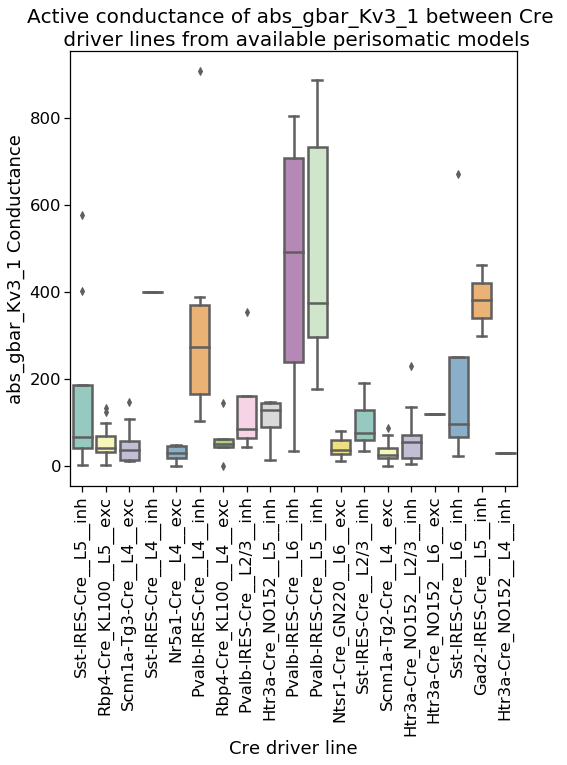

In [21]:
graph_parameter_cre('abs_gbar_Kv3_1')

In [12]:
cre_color = ['Gad2-IRES-Cre__L5__inh',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Htr3a-Cre_NO152__L4__inh',
 'Htr3a-Cre_NO152__L5__inh',
 'Htr3a-Cre_NO152__L5-L6__exc',
 'Nr5a1-Cre__L4__exc',
 'Ntsr1-Cre_GN220__L6__exc',
 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L5__inh',
 'Pvalb-IRES-Cre__L6__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Rbp4-Cre_KL100__L5__exc',
 'Scnn1a-Tg2-Cre__L4__exc',
 'Scnn1a-Tg3-Cre__L2/3-L4__exc',
 'Sst-IRES-Cre__L1-L2/3__inh',
 'Sst-IRES-Cre__L4__inh',
 'Sst-IRES-Cre__L5__inh',
 'Sst-IRES-Cre__L6__inh']

cre_line_palette = {'Gad2-IRES-Cre__L5__inh':"#D98463", 'Htr3a-Cre_NO152__L2/3__inh':"#DF6BC6", 'Htr3a-Cre_NO152__L4__inh':"#DF6BC6", 
                    'Htr3a-Cre_NO152__L5__inh':"#DF6BC6", 'Htr3a-Cre_NO152__L5-L6__exc':"#DF6BC6", 
                    'Nr5a1-Cre__L4__exc':"#43BCA9",
 'Ntsr1-Cre_GN220__L6__exc':"#70849A",
 'Pvalb-IRES-Cre__L2/3__inh':"#CD3449",
 'Pvalb-IRES-Cre__L4__inh':"#CD3449",
 'Pvalb-IRES-Cre__L5__inh':"#CD3449",
 'Pvalb-IRES-Cre__L6__inh':"#CD3449",
 'Rbp4-Cre_KL100__L4__exc':"#009B81",
 'Rbp4-Cre_KL100__L5__exc':"#009B81",
 'Scnn1a-Tg2-Cre__L4__exc':"#59B7B4",
 'Scnn1a-Tg3-Cre__L2/3-L4__exc':"#65AA8A",
 'Sst-IRES-Cre__L1-L2/3__inh':"#B35F1F",
 'Sst-IRES-Cre__L4__inh':"#B35F1F",
 'Sst-IRES-Cre__L5__inh':"#B35F1F",
 'Sst-IRES-Cre__L6__inh':"#B35F1F"}

In [13]:
def graph_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = abs_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=cre_color, data=graph_spec, s = 100, palette=cre_line_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='{} Transcriptomic Gene Expression'.format(gene_symbol), ylabel='{} Conductance'.format(parameter_type))

In [23]:
def graph_conductance_exp_no_color(parameter_type, gene_symbol):
    cre_parameter_df_spec = abs_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, data=graph_spec, s = 100)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='{} Transcriptomic Gene Expression'.format(gene_symbol), ylabel='{} Conductance'.format(parameter_type))

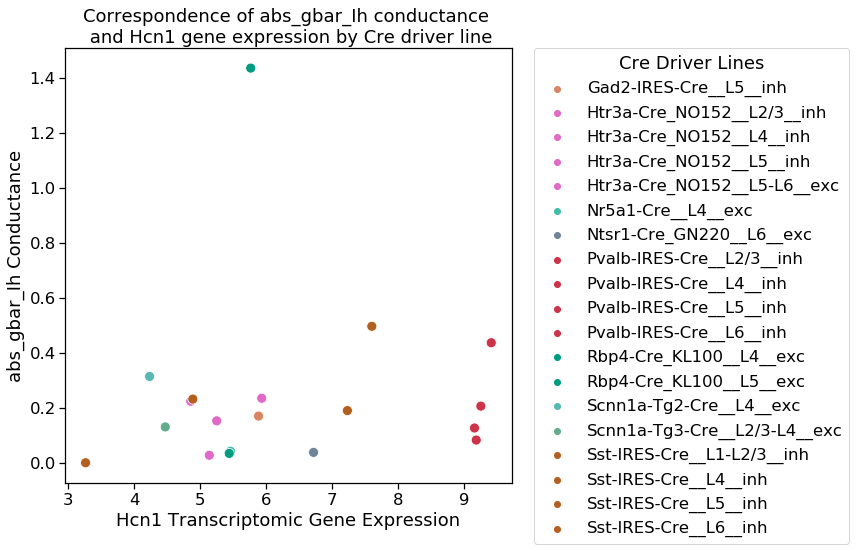

In [26]:
graph_conductance_exp('abs_gbar_Ih', 'Hcn1')

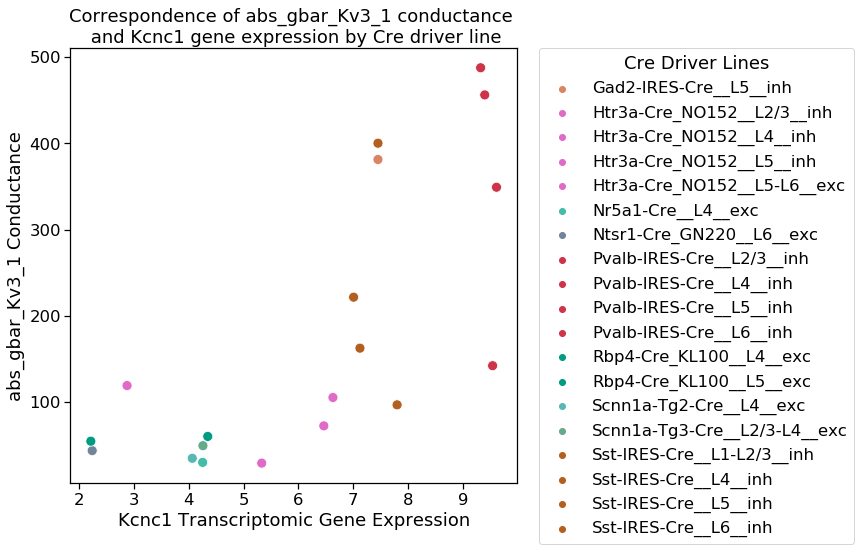

In [27]:
graph_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1')

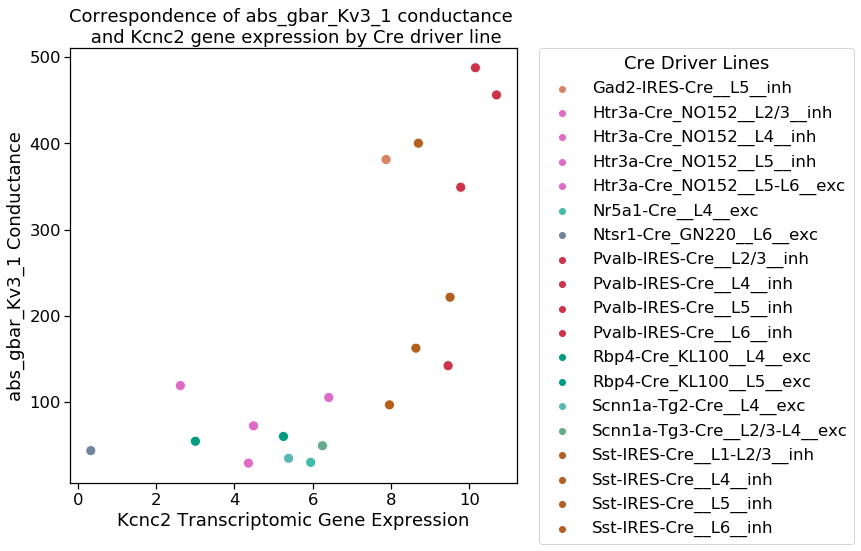

In [14]:
graph_conductance_exp('abs_gbar_Kv3_1', 'Kcnc2')

No handles with labels found to put in legend.


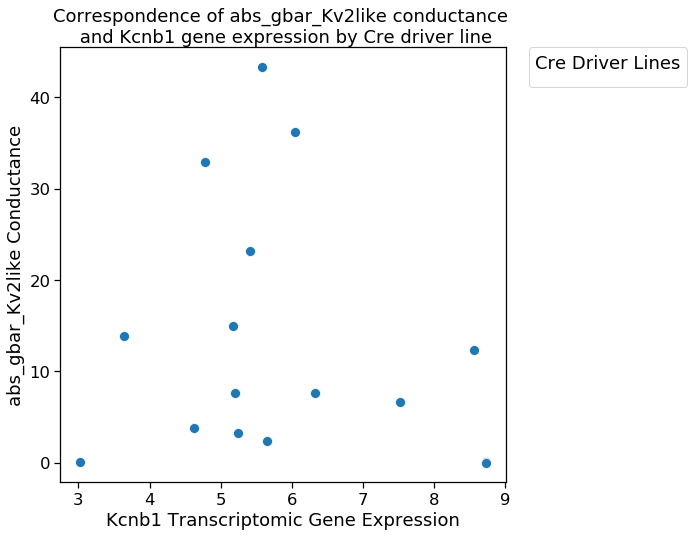

In [38]:
graph_conductance_exp_no_color('abs_gbar_Kv2like', 'Kcnb1')

No handles with labels found to put in legend.


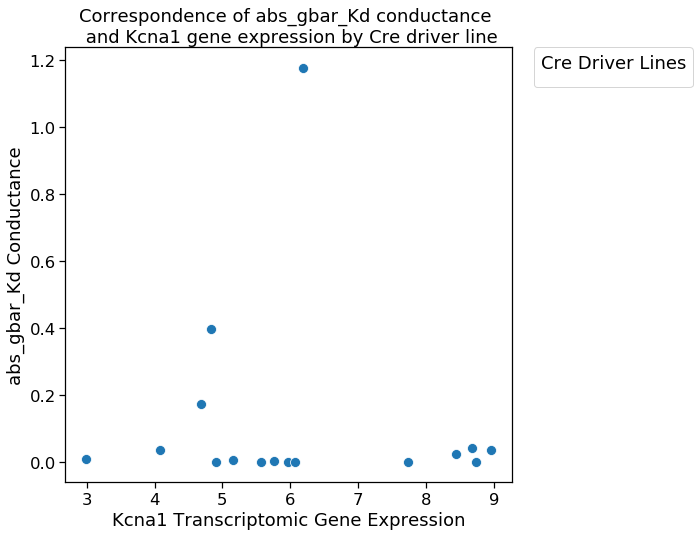

In [39]:
graph_conductance_exp_no_color('abs_gbar_Kd', 'Kcna1')

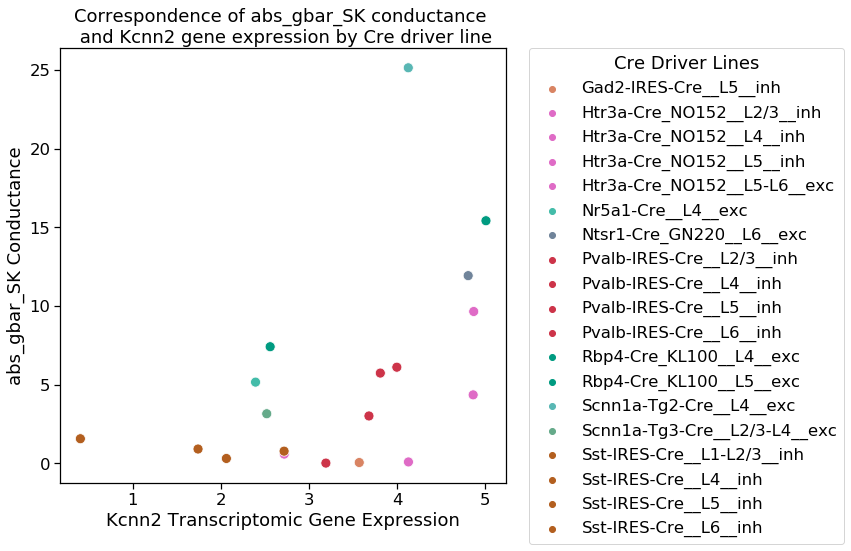

In [29]:
graph_conductance_exp('abs_gbar_SK', 'Kcnn2')

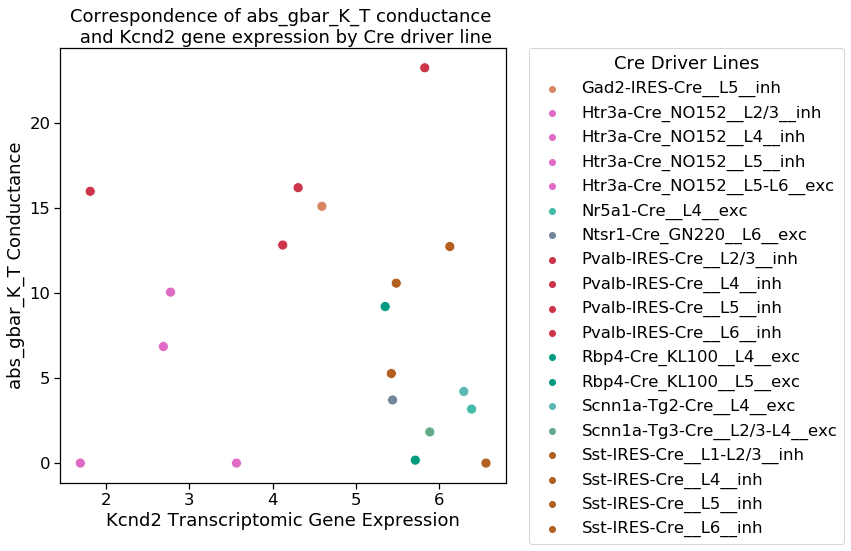

In [15]:
graph_conductance_exp('abs_gbar_K_T', 'Kcnd2')

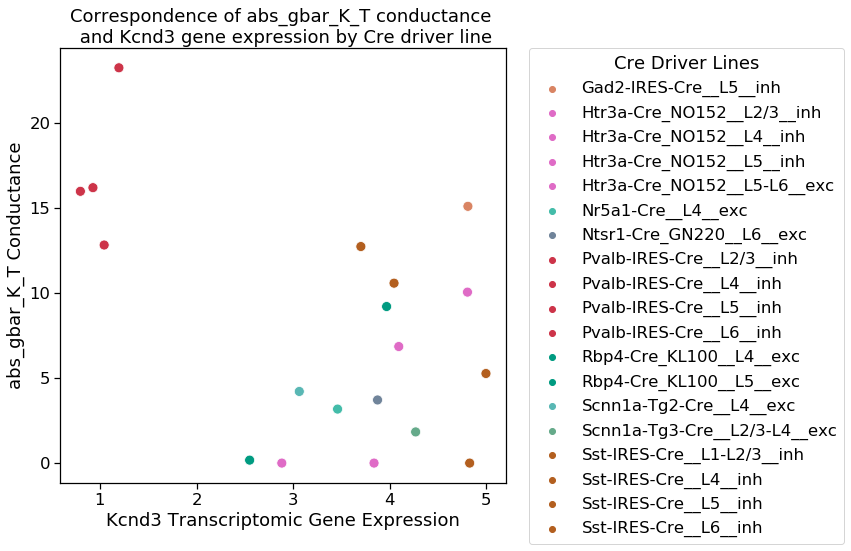

In [16]:
graph_conductance_exp('abs_gbar_K_T', 'Kcnd3')

In [17]:
def spearman_conductance_exp(parameter_type, gene_symbol):
    graph_spec = create_corr(parameter_type, gene_symbol)

    spearman_val = graph_spec.corr(method="spearman").iloc[0, 1]
    print(spearmanr(graph_spec))

In [ ]:
def spearman_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = sep_layer_cre_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)

    spearman_val = graph_spec.corr(method="spearman").iloc[0, 1]
    print(spearmanr(graph_spec))

In [20]:
spearman_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1')

SpearmanrResult(correlation=0.7543859649122807, pvalue=0.00019009628482990714)


In [22]:
spearman_conductance_exp('abs_gbar_K_T', 'Kcnd2')

SpearmanrResult(correlation=-0.1701754385964912, pvalue=0.486099539787445)


In [23]:
spearman_conductance_exp('abs_gbar_K_T', 'Kcnd3')

SpearmanrResult(correlation=-0.29473684210526313, pvalue=0.2205947807705565)


In [24]:
spearman_conductance_exp('abs_gbar_SK', 'Kcnn2')

SpearmanrResult(correlation=0.4736842105263158, pvalue=0.04049410836851531)


In [21]:
spearman_conductance_exp('abs_gbar_Ih', 'Hcn1')

SpearmanrResult(correlation=0.23157894736842102, pvalue=0.3401065100886612)


In [6]:
def create_corr(parameter_type, gene_symbol):
    cre_parameter_df_spec = abs_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    return graph_spec

In [34]:
spearman_corr_ranks = {}
for parameter_ranks in abs_parameters:
    spearman_corr_ranks[parameter_ranks] = {}
    for items in entrenz_symbol_s.iteritems():
        gene_symbol = items[1]
        spearman_val = spearman_conductance_exp(parameter_ranks, gene_symbol)
        spearman_corr_ranks[parameter_ranks][gene_symbol] = spearman_val
    
spearman_corr_ranks

KeyboardInterrupt: 

In [50]:
import json

json = json.dumps(spearman_corr_ranks)
f = open("abs_spearman_corr_ranks.json","w")
f.write(json)
f.close()

In [35]:
spearman_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1')

0.7543859649122807

In [36]:
spearman_conductance_exp('abs_gbar_Ih', 'Hcn1')

0.23157894736842105

In [37]:
def create_matrix(parameter, abs_spearman_dict):
    d = {"symbol": list(abs_spearman_dict[parameter].keys()), "correlation": list(abs_spearman_dict[parameter].values())}
    test = pd.DataFrame(d)
    return test.sort_values(by=['correlation'])

In [38]:
def get_rank_symbol(para, sym):
    df = create_matrix(para, abs_spearman_corr_ranks)
    rank = pd.Index(df['symbol']).get_loc(sym)
    print(df.loc[df['symbol'] == sym])
    return (rank + 1)/12210

In [39]:
get_rank_symbol('abs_gbar_Ih', 'Hcn1')

     symbol  correlation
5058   Hcn1     0.231579


0.8932841932841933

In [40]:
get_rank_symbol('abs_gbar_Kv3_1', 'Kcnc1')

     symbol  correlation
5593  Kcnc1     0.754386


0.9008190008190008

In [41]:
get_rank_symbol('abs_gbar_SK', 'Kcnn1')

     symbol  correlation
5629  Kcnn1     0.401754


0.9420966420966421

In [42]:
def channel_ranks(parameter):
    test = create_matrix(parameter, abs_spearman_corr_ranks)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            print(row['symbol'] + " : " + str(row['correlation']))

In [43]:
def histo_corr(parameter):
    test = create_matrix(parameter, abs_spearman_corr_ranks)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    listof = []
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            listof.append(row['correlation'])
    plt.figure(figsize=(8, 8))
    ax = sns.distplot(listof, bins=len(listof))

C:\Users\Allose\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


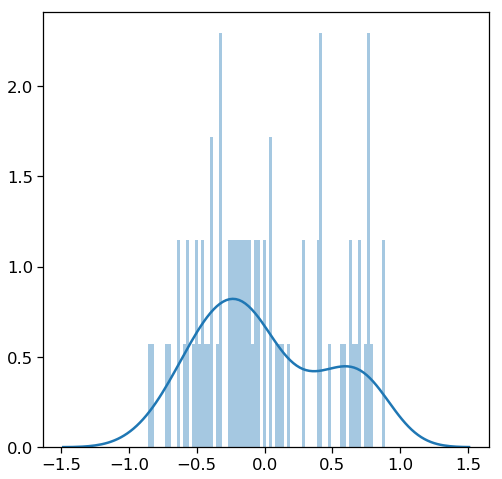

In [44]:
histo_corr('abs_gbar_Kv3_1')

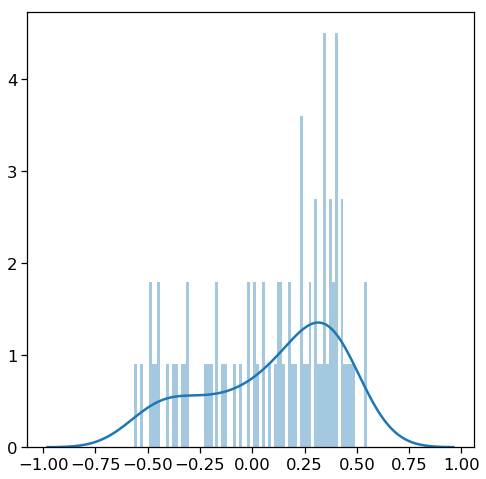

In [54]:
histo_corr('abs_gbar_SK')

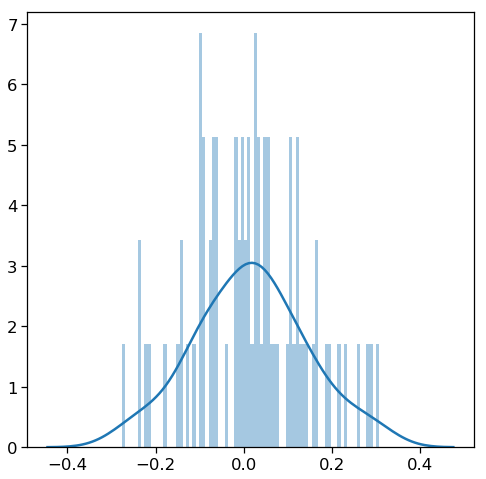

In [56]:
histo_corr('abs_gbar_Ih')

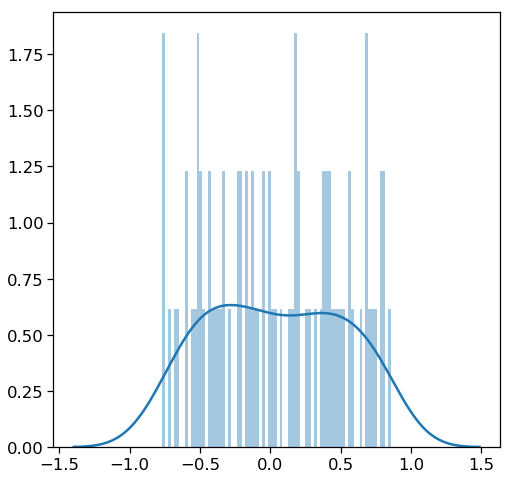

In [57]:
histo_corr('abs_gbar_K_T')

In [64]:
def channel_ranks(parameter):
    test = create_matrix(parameter, abs_spearman_corr_ranks)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    count = 0
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            count += 1
            print(row['symbol'] + " : " + str(row['correlation']))
    print(count)

In [65]:
for parameter in shared_parameters:
    new_par = 'abs_' + parameter
    
    print(new_par)
    channel_ranks(new_par)

abs_gbar_Ih
Trpm2 : 0.30701754385964913
Kcnt1 : 0.2894736842105263
Tpcn1 : 0.2824561403508772
Kcnn2 : 0.2631578947368421
Hcn1 : 0.23157894736842105
Kcna3 : 0.21754385964912282
Kcnj4 : 0.19473684210526315
Kcnn3 : 0.18596491228070175
Hcn2 : 0.16666666666666666
Scn9a : 0.16666666666666666
Hcn3 : 0.156140350877193
Trpc6 : 0.14216763106221753
Trpm4 : 0.13333333333333333
Kcns3 : 0.12478050904927618
Scn1a : 0.12280701754385964
Kcng2 : 0.11929824561403508
Trpc3 : 0.11759544791566143
Mcoln1 : 0.11052631578947368
Kcnn1 : 0.10526315789473684
Trpc4 : 0.10526315789473684
Cacna1b : 0.10350877192982456
Kcnq5 : 0.10175438596491228
Cnga4 : 0.07894736842105263
Kcnj12 : 0.07192982456140351
Kcnb2 : 0.06491228070175438
Kcnj6 : 0.056140350877192984
Kcnu1 : 0.056140350877192984
Cacna1a : 0.054385964912280704
Kcnt2 : 0.04912280701754386
Kcna1 : 0.0456140350877193
Kcnh2 : 0.0456140350877193
Kcnk9 : 0.03866438308569121
Kcna2 : 0.03333333333333333
Cacna1d : 0.02982456140350877
Pkd2 : 0.02982456140350877
Kcns1 : 

Kcnh5 : -0.23870120770940229
Kcnh1 : -0.24912280701754386
Trpv2 : -0.2543859649122807
Kcns1 : -0.26186332180763594
Kcnf1 : -0.32105263157894737
Kcnn2 : -0.3298245614035088
Kcnma1 : -0.3333333333333333
Ryr2 : -0.3333333333333333
Kcnk2 : -0.35789473684210527
Ryr3 : -0.38596491228070173
Cacna1g : -0.3912280701754386
Kcnb2 : -0.39824561403508774
Kcnk10 : -0.42299258130857315
Kcnb1 : -0.4298245614035088
Kcnc4 : -0.4543859649122807
Kcnn3 : -0.46842105263157896
Kcnj6 : -0.48596491228070177
Kcnq5 : -0.4964912280701754
Kcnk4 : -0.5017543859649123
Trpm3 : -0.5210526315789473
Cacna1e : -0.5649122807017544
Kcnk9 : -0.5729358584516061
Kcnv1 : -0.5894736842105263
Kcnh3 : -0.6280701754385964
Kcns2 : -0.6333333333333333
Scn3a : -0.6877192982456141
Kcna4 : -0.7105263157894737
Kcnj2 : -0.8328214930743484
Kcnt2 : -0.8614035087719298
80
abs_gbar_Ca_HVA
Kcnq3 : 0.4017543859649123
Kcnc2 : 0.3894736842105263
Kcna2 : 0.387719298245614
Kcnd2 : 0.3736842105263158
Kcnk2 : 0.33157894736842103
Scn1a : 0.3263157894

In [51]:
from scipy.stats import weightedtau

In [77]:
graph_spec = create_corr('abs_gbar_Kv3_1', 'Kcnc1')
graph_spec = pd.concat([graph_spec, errors_count[['abs_gbar_Kv3_1_err']]], axis = 1)

In [78]:
graph_spec

,abs_gbar_Kv3_1,16502,abs_gbar_Kv3_1_err
cell_type,,,
Gad2-IRES-Cre__L5__inh,381.286051,7.449158,1.414214
Htr3a-Cre_NO152__L2/3__inh,72.512617,6.462288,3.000000
Htr3a-Cre_NO152__L4__inh,29.319888,5.330032,1.000000
Htr3a-Cre_NO152__L5__inh,105.378942,6.628302,2.000000
Htr3a-Cre_NO152__L5-L6__exc,119.208745,2.874626,1.000000
Nr5a1-Cre__L4__exc,30.153270,4.253329,3.464102
Ntsr1-Cre_GN220__L6__exc,43.796749,2.239168,2.236068
Pvalb-IRES-Cre__L2/3__inh,142.236156,9.539327,2.236068
Pvalb-IRES-Cre__L4__inh,349.141168,9.610216,2.449490


In [113]:
weightedtau(graph_spec['abs_gbar_Kv3_1'], graph_spec[16502])

WeightedTauResult(correlation=0.5806620394254276, pvalue=nan)

In [ ]:
filtered_layer = ['Gad2-IRES-Cre__L5__inh', 'Htr3a-Cre_NO152__L2/3__inh', 'Htr3a-Cre_NO152__L4__inh', 'Htr3a-Cre_NO152__L5__inh', 
 'Htr3a-Cre_NO152__L6__exc', 'Nr5a1-Cre__L4__exc', 'Ntsr1-Cre_GN220__L6__exc', 'Pvalb-IRES-Cre__L2/3__inh',
 'Pvalb-IRES-Cre__L4__inh', 'Pvalb-IRES-Cre__L5__inh', 'Pvalb-IRES-Cre__L6__inh', 'Rbp4-Cre_KL100__L4__exc', 
 'Rbp4-Cre_KL100__L5__exc', 'Scnn1a-Tg2-Cre__L4__exc', 'Scnn1a-Tg3-Cre__L4__exc', 'Sst-IRES-Cre__L2/3__inh', 
 'Sst-IRES-Cre__L4__inh', 'Sst-IRES-Cre__L5__inh', 'Sst-IRES-Cre__L6__inh']

In [47]:
shared_parameters = ['gbar_Ih', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA']

In [63]:
sep_layer_cre_parameter_df.corrwith(abs_parameter_df, axis = 0, drop=True) 

Series([], dtype: float64)

In [74]:
sep_layer_cre_parameter_df.loc[:, filled_list]

,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas
Gad2-IRES-Cre__L5__inh,0.000488,NaN,NaN,NaN,3.201234e-02,0.000125,1.818406,0.000480,7.290051e-03,0.008271,313.267829,0.000213,0.000074,1.941620e-06
Htr3a-Cre_NO152__L2/3__inh,0.000763,0.452069,1.564326e-03,6.017358e-02,2.788123e-02,0.067356,0.235402,0.000362,2.058590e-03,0.013284,327.152609,0.000327,0.000578,1.658285e-04
Htr3a-Cre_NO152__L4__inh,0.000748,NaN,NaN,NaN,6.209996e-07,0.021235,0.142927,0.000295,3.285403e-03,0.000192,533.545741,0.000797,0.000590,3.549250e-07
Htr3a-Cre_NO152__L5__inh,0.000185,0.670528,6.045610e-08,2.730513e-03,3.955527e-02,0.000643,0.638604,0.000619,3.395834e-03,0.018487,777.784361,0.000278,0.000195,1.867627e-05
Htr3a-Cre_NO152__L5-L6__exc,0.000679,0.477561,1.988422e-04,9.098079e-09,8.187409e-08,0.001802,0.360560,0.000090,1.669806e-03,0.006457,477.531283,0.000298,0.000005,1.110426e-07
Nr5a1-Cre__L4__exc,0.000201,0.507800,8.770612e-04,4.536617e-02,1.040859e-02,0.017505,0.126182,0.000480,4.071605e-03,0.004392,668.405290,0.000183,0.000661,4.886277e-05
Ntsr1-Cre_GN220__L6__exc,0.000136,0.768300,1.020900e-04,3.485229e-02,1.071781e-02,0.044394,0.149601,0.000568,3.237572e-03,0.000762,515.238148,0.000588,0.000343,3.733652e-05
Pvalb-IRES-Cre__L2/3__inh,0.000383,NaN,NaN,NaN,8.797052e-02,0.014408,0.693312,0.000364,7.190846e-03,0.016836,210.822267,0.000375,0.000610,1.610261e-05
Pvalb-IRES-Cre__L4__inh,0.001345,NaN,NaN,NaN,4.826386e-02,0.019854,1.121246,0.000398,2.339572e-03,0.009650,208.967576,0.000259,0.000079,6.338484e-05
Pvalb-IRES-Cre__L5__inh,0.000481,NaN,NaN,NaN,3.125011e-02,0.024287,1.266772,0.000575,4.233758e-03,0.014760,394.600137,0.000203,0.000456,6.273016e-05


In [64]:
filled_list = ['gbar_Ih', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas']
